In [173]:
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [174]:
def init(target_amount=100):
    state = list(range(1, target_amount))
    value = [0]*target_amount + [0]
    reward = [0]*target_amount + [1]
    return state, value, reward

def argmax(arr, resolve_clash='first'):
    '''
    resolve_clash: How the clashes are resolved in case of multiple max
                   values {'random', 'first', 'last'} (default->'first')
    '''
    assert len(arr)>0, "argmax requires a non-empty list"
    max_ind = []
    max_val = -1e32
    for i, val in enumerate(arr):
        if max_val<val:
            max_ind = []
            max_ind.append(i)
            max_val = val
        elif max_val==val:
            max_ind.append(i)
    if resolve_clash=='random':
        return max_ind[random.randint(0,len(max_ind)-1)]
    elif resolve_clash=='last':
        return max_ind[-1]
    return max_ind[0]

def one_step_forward(s, value, reward, gamma, ph, actions):
    v = [0] * len(value)
    for a in actions:
        v[a] = ph * (reward[s + a] + gamma * value[s + a])\
                            + (1 - ph) * (reward[s - a] + gamma * value[s - a])
    return v

def run(state, 
        value, 
        reward,
        target_amount=100,
        ph=0.4, 
        theta=1e-20, 
        gamma=0.99):
    sweeps = 0
    values=[]
    while True:
        sweeps += 1
        delta = 0.0
        for s in state:
            v = value[s]
            actions = list(range(1, 1 + min(s, target_amount - s)))
            action_vals = one_step_forward(s, value, reward, gamma, ph, actions)
            value[s] = max(action_vals)
            delta = max(delta, abs(value[s] - v))
        values = values + [value[:]]
        if delta<theta:
            break 
    return value, sweeps, values

def get_optimal_policy(state, 
                       value, 
                       reward,
                       target_amount=100,
                       ph=0.4,
                       gamma=1,
                       resolve_clash='first'):
    pi = [0]*(target_amount)
    for s in state:
        actions = list(range(1, 1 + min(s, target_amount - s)))
        action_vals = one_step_forward(s, value, reward, gamma, ph, actions)
        pi[s] = argmax(action_vals, resolve_clash=resolve_clash)
    return pi

def solve(target_amount=100, ph=0.4, theta=1e-20, gamma=1, resolve_clash='first'):
    # Initialize
    state, value, reward = init(target_amount=target_amount)

    # Value iteration algorithm
    value, sweeps, values = run(state,
                        value,
                        reward,
                        target_amount=target_amount,
                        ph=ph,
                        theta=theta,
                        gamma=gamma)

    # Optimal Policy
    pi = get_optimal_policy(state, 
                            value, 
                            reward,
                            target_amount=target_amount,
                            ph=ph,
                            gamma=gamma,
                            resolve_clash=resolve_clash)
    print("Optimal Policy:\n{0}".format(pi))
    return pi, value, values, sweeps
    

In [175]:
target_amount = 100
ph = 0.25
theta = 1e-50
gamma = 1
resolve_clash='first'
pi, value, values, sweeps = solve(target_amount=target_amount, 
                                  ph=ph, 
                                  theta=theta, 
                                  gamma=gamma, 
                                  resolve_clash=resolve_clash)

Optimal Policy:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 12, 11, 10, 9, 17, 7, 6, 5, 4, 3, 2, 1, 25, 1, 23, 3, 4, 5, 6, 7, 8, 34, 10, 11, 12, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 50, 49, 2, 3, 46, 5, 6, 7, 8, 9, 10, 11, 12, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 23, 1, 25, 1, 23, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]


<Figure size 640x480 with 0 Axes>

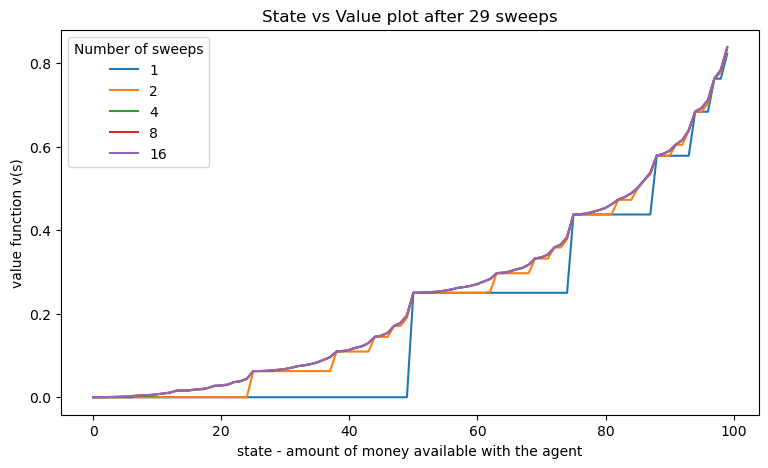

In [176]:
leg = []
i = 1
plt.clf()
plt.figure(figsize=(9,5))
while i<len(values):
    leg += [str(i)]
    plt.plot(values[i-1][:-1])
    i *= 2

plt.legend(leg, title='Number of sweeps')
plt.xlabel("state - amount of money available with the agent")
plt.ylabel("value function v(s)")
plt.title(f"State vs Value plot after {sweeps} sweeps")
plt.show();

<Figure size 640x480 with 0 Axes>

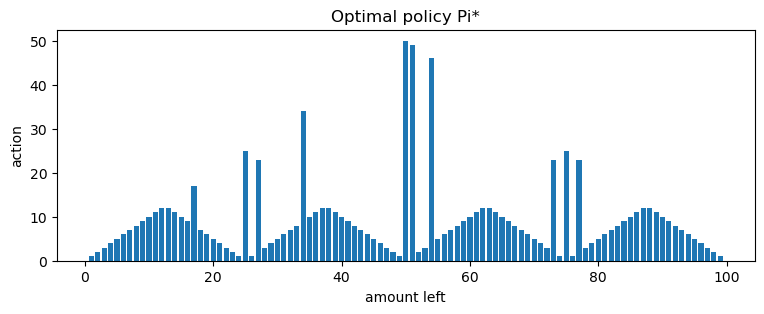

In [177]:
plt.clf()
plt.figure(figsize=(9,3))
plt.bar(range(1, len(pi)), pi[1:])
plt.xlabel('amount left')
plt.ylabel('action')
plt.title('Optimal policy Pi*')
plt.show();